In [30]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import IPython.display as ipd
import random
import math

In [31]:
class AudioSignal:
    def __init__(self):
        self.hertz = 22050
        
    def load_audio(self, sound_source):
        if(type(sound_source) is str):
            self.signal, self.sr = librosa.load(sound_source, sr=self.hertz)
        else:
            self.signal = sound_source
            self.sr = self.hertz
        
    def plot_amplitude(self):
        librosa.display.waveplot(self.signal, sr=self.hertz)
        plt.xlabel("time")
        plt.ylabel("amplitude")
        plt.show()
        
    def mix_noise(self, noise_path):
        noise_signal, noise_sr = librosa.load(noise_path, sr=self.hertz)
        while(noise_signal.shape[0] < self.signal.shape[0]):
            noise_signal = np.concatenate((noise_signal, noise_signal))
        noise_signal = noise_signal[:self.signal.shape[0]]
        wav_with_bg = self.signal * np.random.uniform(0.8, 1.2) + \
                      noise_signal * np.random.uniform(0, 0.1)
        
        newSignal = AudioSignal()
        newSignal.load_audio(wav_with_bg)
        return newSignal
    
    def cut_mix(self, new_sound):
        while(new_sound.shape[0] < self.signal.shape[0]):
            new_sound = np.concatenate((new_sound, new_sound))
        new_sound = new_sound[:self.signal.shape[0]]
        
        lm = random.uniform(0, 1)
        start_point = random.randrange(0, self.signal.shape[0])
        length_cut = int(self.signal.shape[0] * math.sqrt(1 - lm))
        if(start_point + length_cut > self.signal.shape[0]):
            length_cut = self.signal.shape[0] - start_point
        
        constructed_sound = self.signal[0:start_point]
        constructed_sound = np.concatenate((constructed_sound, new_sound[start_point:start_point+length_cut]))
        constructed_sound = np.concatenate((constructed_sound, self.signal[start_point+length_cut:]))
        
        print("Concatenated at {start_point}/{total_length} for {length}".format(start_point = start_point, total_length = self.signal.shape[0], length = length_cut))
        
        return constructed_sound

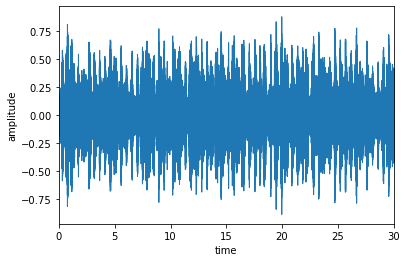

In [32]:
audioSignal = AudioSignal()
audioSignal.load_audio("D:\\music\music.wav")
audioSignal.plot_amplitude()

noiseSignal = AudioSignal()
noiseSignal.load_audio(r"D:\\music\noise1.wav")

In [33]:
ipd.Audio(audioSignal.signal, rate=audioSignal.sr)

In [34]:
newAudio = audioSignal.mix_noise(r"D:\\music\noise1.wav")

In [35]:
ipd.Audio(newAudio.signal, rate=newAudio.sr)

In [58]:
cut_mix_audio = audioSignal.cut_mix(noiseSignal.signal)

Concatenated at 175825/661794 for 68140


In [59]:
ipd.Audio(cut_mix_audio, rate=newAudio.sr)

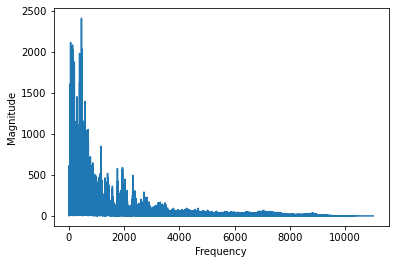

In [27]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

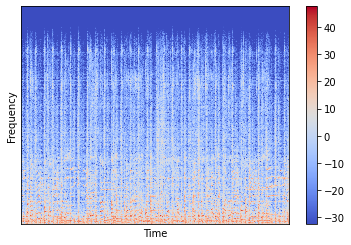

In [6]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectogram = np.abs(stft)
log_spectogram = librosa.amplitude_to_db(spectogram)

librosa.display.specshow(log_spectogram, sr=hertz, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

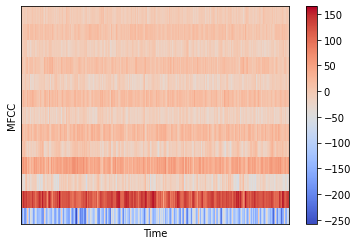

In [7]:
mfcc = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc=13)
librosa.display.specshow(mfcc, sr=hertz, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

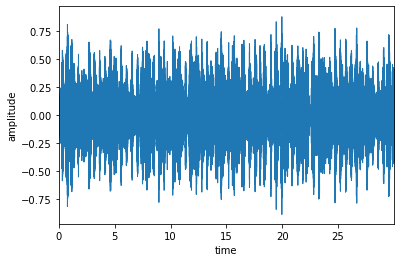

In [12]:
reconstructed_audio = librosa.istft(stft)
librosa.display.waveplot(reconstructed_audio, sr=hertz)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

In [17]:
sf.write('output.wav', reconstructed_audio, hertz)